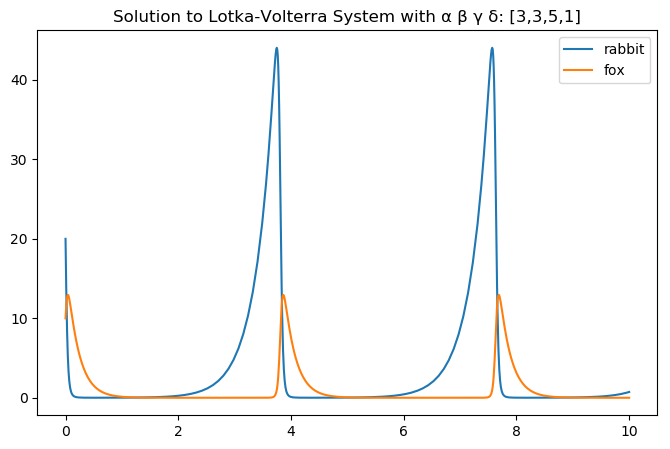

0.7325003316838737

In [135]:
using ParameterizedFunctions
using DifferentialEquations
using PyCall
@pyimport matplotlib.pyplot as plt
using PyPlot

# Define System
f = @ode_def LotkaVolterraExample begin
  drabbit  = α*rabbit  - β*rabbit*fox
  dfox = -γ*fox + δ*rabbit*fox
end α β γ δ

# Define initial condition and problem parameters
init_pop = [20.0;10.0]
final_time = 10
tspan = (0.0, final_time)
output = Dict([])

# Visualize Solution
params = [3,3,5,1]
prob = ODEProblem(f, init_pop, tspan, params)
sol = solve(prob, Tsit5(), reltol=1e-6)
figure(figsize=(8,5))
plot(sol.t,getindex.(sol.u,1), label="rabbit")
plot(sol.t,getindex.(sol.u,2), label="fox")
legend()
title("Solution to Lotka-Volterra System with α β γ δ: " * "[3,3,5,1]")
show()

# True Output
true_rabbit = sol(10)[1]

In [2]:
# Generate Data set 
for _ in 1:1000
    params = rand(4) * 5
    prob = ODEProblem(f, init_pop, tspan, params)
    output[params] = solve(prob, Tsit5(), reltol=1e-6,save_everystep=false)(final_time)
end

x = [(push!(k[1:4],v[1])) for (k, v) in collect(output)]

1000-element Array{Array{Float64,1},1}:
 [0.216577, 2.4767, 3.84049, 3.02925, 3.61738e-8]    
 [2.89628, 2.67808, 1.62645, 4.64312, 0.000134344]   
 [1.47148, 1.9095, 0.0628541, 0.943315, 4.74503e-8]  
 [0.637185, 1.25615, 0.497471, 0.412272, 1.37565e-14]
 [4.57506, 2.82574, 0.0555578, 4.75149, 9.13475e-8]  
 [4.93253, 2.3999, 0.749862, 1.64475, 1.07889]       
 [2.06632, 3.97905, 2.11072, 0.761283, 0.0640155]    
 [2.38968, 4.61823, 0.45124, 0.777916, 3.89422e-11]  
 [3.46217, 3.56033, 2.9163, 0.676898, 4.67825]       
 [3.5666, 0.044522, 1.95817, 4.14158, 0.000312427]   
 [1.68615, 4.0626, 4.61803, 2.68387, 0.408996]       
 [3.03046, 2.77987, 2.17945, 1.56356, 2.55389e-6]    
 [0.521925, 0.206829, 0.431705, 4.15595, 1.24168e-13]
 ⋮                                                   
 [2.03038, 0.820398, 4.39411, 0.905516, 8.03627]     
 [2.22394, 2.04445, 3.74025, 1.72789, 0.00239146]    
 [2.36853, 3.23136, 3.07024, 0.864786, 0.000518257]  
 [1.66362, 1.54599, 1.10928, 2.21716, 6.69

In [136]:
# Building Linear Surrogate Model
using DataFrames
using GLM
Dat = DataFrame(hcat([col for col in x]...)')
names!(Dat, [:α, :β, :γ, :δ, :Y])
ols = lm(@formula((Y) ~ α + β + γ + δ), Dat)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + α + β + γ + δ

Coefficients:
              Estimate Std.Error   t value Pr(>|t|)
(Intercept)    3.54623   2.97369   1.19254   0.2333
α              1.44654  0.577061   2.50673   0.0123
β            -0.264356  0.562539 -0.469933   0.6385
γ              1.53884  0.552161   2.78694   0.0054
δ             -2.84502  0.558127  -5.09745    <1e-6


In [ ]:
# TODO: Implement optimization 
# e.g. Derive posterior distribution given linear surrogate model 